In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_train=pd.read_csv('SalaryData_Train.csv')

In [3]:
salary_test=pd.read_csv('SalaryData_Test.csv')

In [4]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

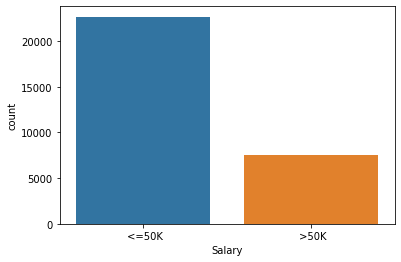

In [7]:
sns.countplot(salary_train['Salary'])

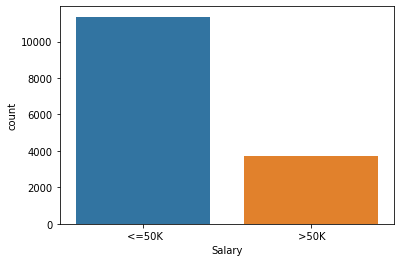

In [8]:
sns.countplot(salary_test['Salary'])

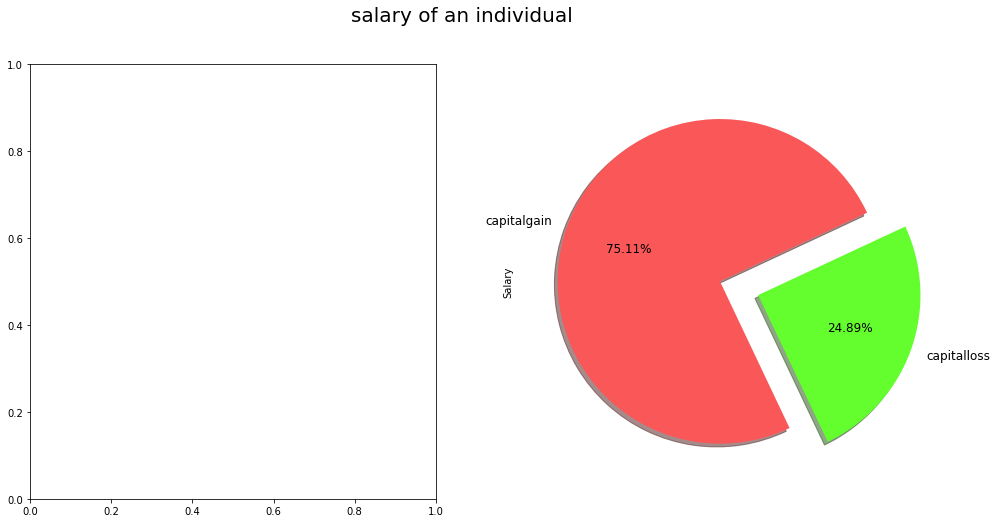

In [9]:
plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=20)

salary_train["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

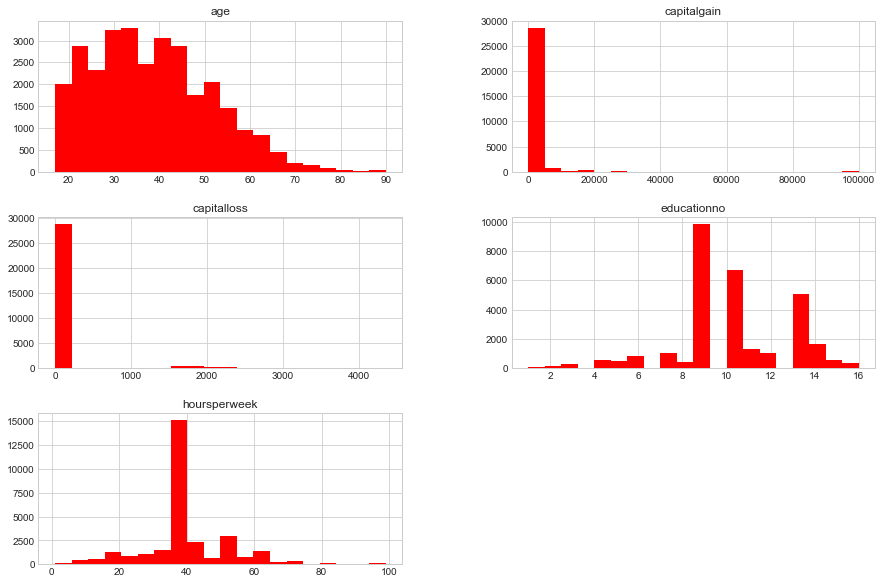

In [10]:
plt.style.use('seaborn-whitegrid')

salary_train.hist(bins=20, figsize=(15,10), color='red')
plt.show()


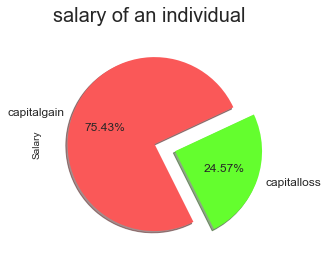

In [12]:
#plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=20)

salary_test["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

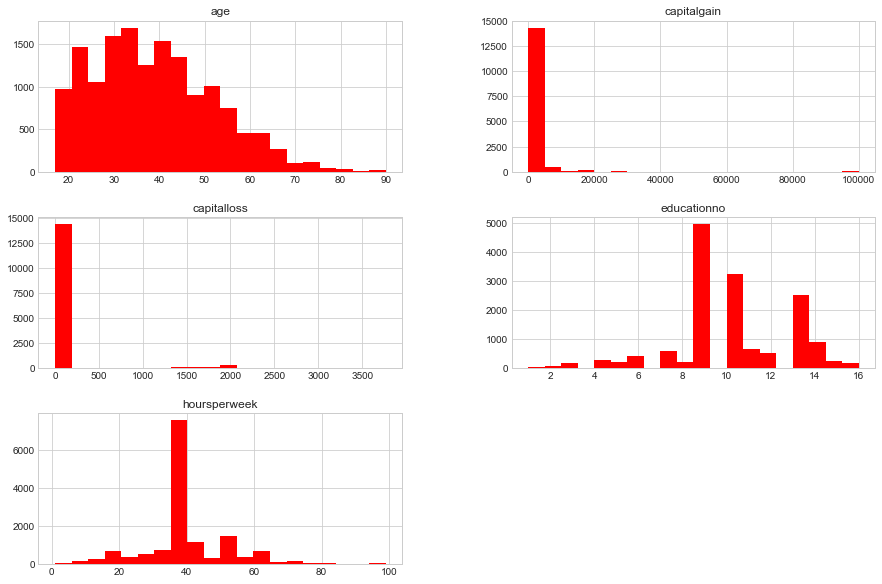

In [13]:
plt.style.use('seaborn-whitegrid')

salary_test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [15]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [16]:
col_names=list(salary_train.columns)
col_names

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [17]:
train_X=salary_train[col_names[0:13]]
train_X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [18]:
train_Y=salary_train[col_names[13]]
train_Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [19]:
test_x=salary_test[col_names[0:13]]
test_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [20]:
test_y=salary_test[col_names[13]]
test_y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [21]:
from sklearn.naive_bayes import GaussianNB
Gnbmodel=GaussianNB()

In [22]:
train_pred_gau=Gnbmodel.fit(train_X,train_Y).predict(train_X)
train_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [23]:

test_pred_gau=Gnbmodel.fit(train_X,train_Y).predict(test_x)
test_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [26]:
train_acc_gau=np.mean(train_pred_gau==train_Y)
train_acc_gau

0.7953317197705646

In [27]:
test_acc_gau=np.mean(test_pred_gau==test_y)
test_acc_gau

0.7946879150066402

In [28]:
from sklearn.naive_bayes import MultinomialNB
Mnbmodel=MultinomialNB()

In [29]:
train_pred_multi=Mnbmodel.fit(train_X,train_Y).predict(train_X)
train_pred_multi

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [30]:
test_pred_multi=Mnbmodel.fit(train_X,train_Y).predict(test_x)
test_pred_multi

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [31]:
train_acc_multi=np.mean(train_pred_multi==train_Y)
train_acc_multi

0.7729186698053778

In [32]:
test_acc_multi=np.mean(test_pred_multi==test_y)
test_acc_multi

0.7749667994687915

In [33]:
!pip install scikit-plot

In [34]:
pip install autopep8

Note: you may need to restart the kernel to use updated packages.
